In [21]:
import radiant as rad
import numpy as np

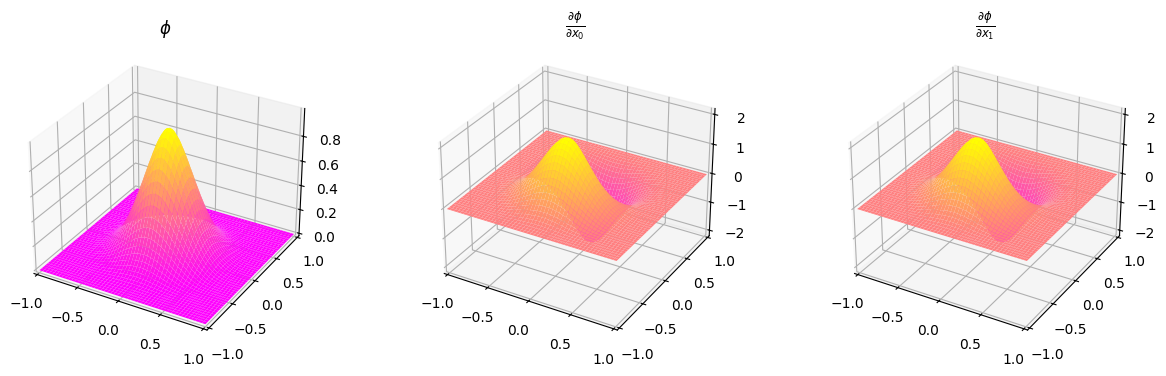

In [22]:
a = -1.
b = 1.

d = 2
k = 1
delta = 1.

ranges = ((a, b),) * d
xc = rad.gridn(((0., 1.),) * d, 1, flat=True)
phi = rad.Wendland(d, k)

rad.plot.spread(
    ranges,
    lambda *x: np.sum(phi(delta, *x, *xc), axis=0),
    *[lambda *x: np.sum(phi(delta, *x, *xc, m=i), axis=0) for i in range(d)],
    n=1000,
    titles=[r"$\phi$"] + [r"$\frac{\partial\phi}{\partial x_" + f"{i}" + "}$" for i in range(d)],
    figsize=(15, 4)
)